In [1]:
import json
import os

import sys
sys.path.append('..')
sys.path.append('../ark')

# NOTE: just for visualizing on blank space for the time being
import numpy as np

from ark.mibi import tiling_utils

# 1. Automatically generate tiled regions

This automatically creates tiles which define FOVs on the MIBI slide based on user-set parameters.

### Define paths to the JSON data

In [2]:
base_dir = "../data/example_dataset"
json_tiling_dir = os.path.join(base_dir, "json_tiling_data")
fov_list_path = os.path.join(json_tiling_dir, 'fov_list_single_fov_tma.json')
moly_path = os.path.join(json_tiling_dir, 'moly_point.json')
tiled_output_path = os.path.join(json_tiling_dir, 'tiled_output_tma.json')

### Define whether TMA is used or not

In [3]:
# tma = False
tma = True

### Set tiling parameters

In [4]:
# list of parameters:
# starting x coordinate and y coordinate for each fov (taken from fov_list_file)
# number of fovs along the x- and y-axis for each fov (set by user)
# x- and y-axis step size (set by user)
# randomize the order of the fovs or not (set by user)
tiling_params, moly_point = tiling_utils.set_tiling_params(fov_list_path, moly_path, tma=tma)

Enter number of x fovs for region TheFirstFOV (at least 3 required):  3
Enter number of y fovs for region TheFirstFOV (at least 3 required):  3
Enter the x image size for region TheFirstFOV:  50
Enter the y image size for region TheFirstFOV:  50
Randomize fovs for region TheFirstFOV? Y/N:  N
Insert moly points between runs? Y/N:  y
Specify moly point tile interval? Y/N:  Y
Enter the fov interval size to insert moly points:  3


### Create the FOV tiles for each region

In [5]:
tiled_regions = tiling_utils.create_tiled_regions(tiling_params, moly_point, tma=tma)

In [6]:
# write the tiled output
with open(tiled_output_path, 'w') as top:
    json.dump(tiled_regions, top)

# 2. Slide overlay QC (for TMAs only)

Using a pre-defined JSON of FOVs, compares with the automatically-generated FOVs from the previous step and allows for remapping if necessary.

### Define QC parameters, read data in

NOTE: the data contained in `proposed_tiled_output_path` is assumed to have the same tile dimensions and the same Moly point as the data in `tiled_output_path`.

In [7]:
proposed_tiled_output_path = os.path.join(json_tiling_dir, 'tiled_output_tma_proposed.json')
slide_path = os.path.join(json_tiling_dir, 'slide.jpg')

In [8]:
with open(proposed_tiled_output_path, 'r') as ptop:
    tiled_regions_proposed = json.load(ptop)

In [9]:
# NOTE: for time being, just visualize on a blank space
slide_data = np.full((1000, 1000, 3), 255)

In [10]:
tiled_regions

{'exportDateTime': '2021-12-07T02:52:28',
 'fovFormatVersion': '1.5',
 'fovs': [{'scanCount': 1,
   'centerPointMicrons': {'x': 100, 'y': 100},
   'timingChoice': 7,
   'frameSizePixels': {'width': 2048, 'height': 2048},
   'imagingPreset': {'preset': 'Normal',
    'aperture': '2',
    'displayName': 'Fine',
    'defaults': {'timingChoice': 7}},
   'sectionId': 8201,
   'slideId': 5931,
   'name': 'row100_col100',
   'timingDescription': '1 ms'},
  {'scanCount': 1,
   'centerPointMicrons': {'x': 100, 'y': 250},
   'timingChoice': 7,
   'frameSizePixels': {'width': 2048, 'height': 2048},
   'imagingPreset': {'preset': 'Normal',
    'aperture': '2',
    'displayName': 'Fine',
    'defaults': {'timingChoice': 7}},
   'sectionId': 8201,
   'slideId': 5931,
   'name': 'row100_col250',
   'timingDescription': '1 ms'},
  {'scanCount': 1,
   'centerPointMicrons': {'x': 100, 'y': 400},
   'timingChoice': 7,
   'frameSizePixels': {'width': 2048, 'height': 2048},
   'imagingPreset': {'preset': 'N

### Map proposed tiles to their closest automatically-generated tile (Euclidean)

In [11]:
proposed_to_auto_map, proposed_tiles_info, auto_tiles_info = tiling_utils.assign_closest_tiled_regions(tiled_regions_proposed, tiled_regions, moly_point['name'])

In [12]:
proposed_to_auto_map

{'row225_col175': 'row250_col100',
 'row75_col325': 'row100_col250',
 'row75_col175': 'row100_col100',
 'row75_col25': 'row100_col100',
 'row375_col25': 'row400_col100',
 'row375_col175': 'row400_col100'}

In [13]:
proposed_tiles_info

{'row225_col175': {'centroid': (225, 175), 'size': (2048, 2048)},
 'row75_col325': {'centroid': (75, 325), 'size': (2048, 2048)},
 'row75_col175': {'centroid': (75, 175), 'size': (2048, 2048)},
 'row75_col25': {'centroid': (75, 25), 'size': (2048, 2048)},
 'row375_col25': {'centroid': (375, 25), 'size': (2048, 2048)},
 'row375_col175': {'centroid': (375, 175), 'size': (2048, 2048)}}

In [14]:
auto_tiles_info

{'row100_col100': {'centroid': (100, 100), 'size': (2048, 2048)},
 'row100_col250': {'centroid': (100, 250), 'size': (2048, 2048)},
 'row100_col400': {'centroid': (100, 400), 'size': (2048, 2048)},
 'row250_col100': {'centroid': (250, 100), 'size': (2048, 2048)},
 'row250_col250': {'centroid': (250, 250), 'size': (2048, 2048)},
 'row250_col400': {'centroid': (250, 400), 'size': (2048, 2048)},
 'row400_col100': {'centroid': (400, 100), 'size': (2048, 2048)},
 'row400_col250': {'centroid': (400, 250), 'size': (2048, 2048)},
 'row400_col400': {'centroid': (400, 400), 'size': (2048, 2048)}}

### Visualize and remap tiles

Output()

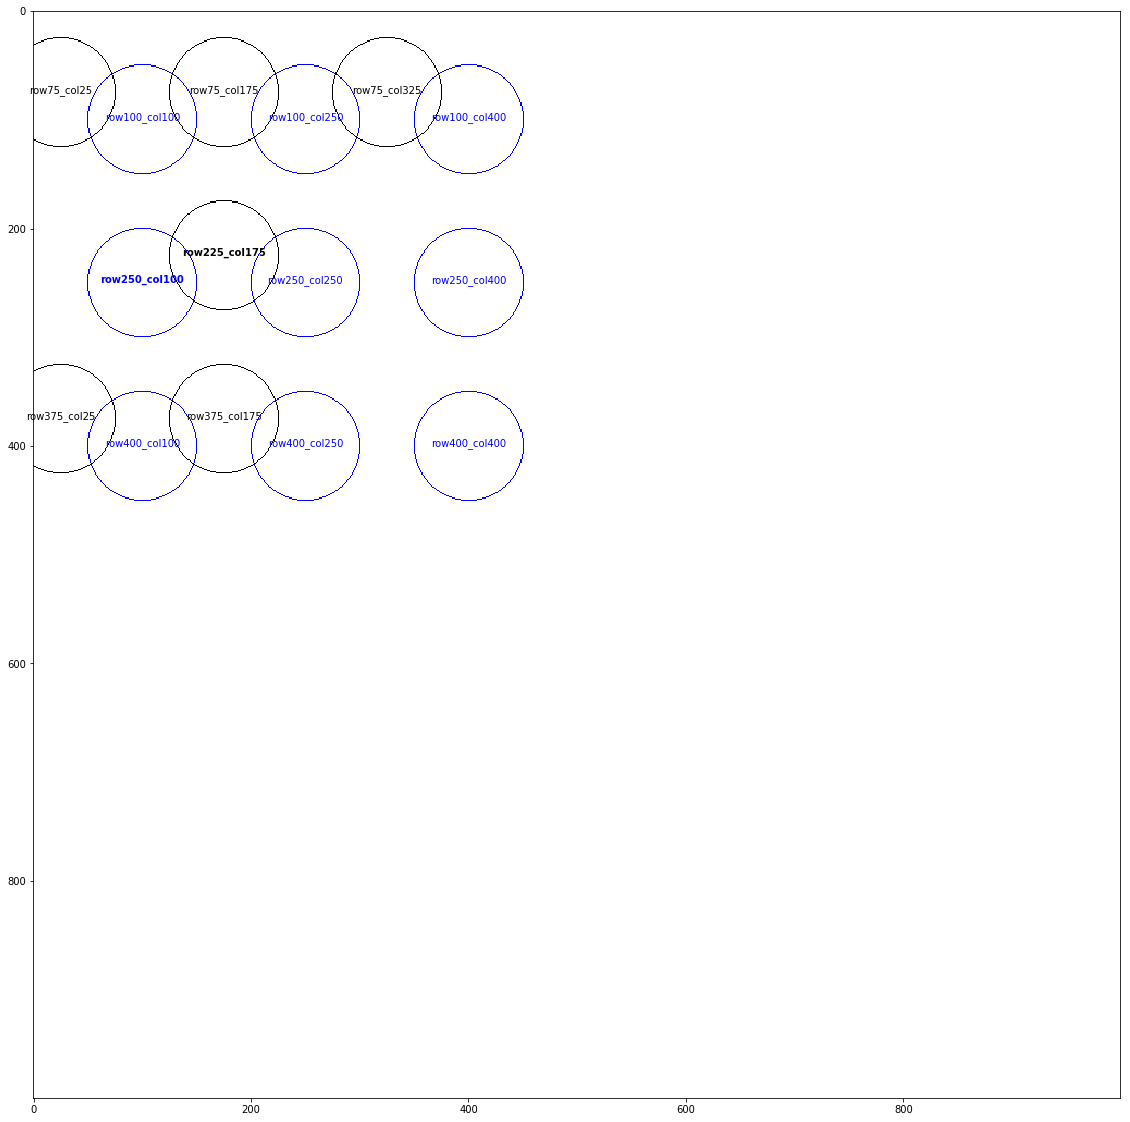

In [15]:
tiling_utils.interactive_remap(proposed_to_auto_map, proposed_tiles_info, auto_tiles_info, slide_data, figsize=(20, 20))